In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from numpy import log
import math
from pmdarima.arima.utils import ndiffs
from sklearn.metrics import mean_squared_error, mean_absolute_error
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import autocorrelation_plot
import warnings
warnings.filterwarnings("ignore")


C:\Users\kseni\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\kseni\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [2]:
#COLLECT ALL AVAILABLE DATA FOR Beijing, FROM ALL YEARS
Beijing_Data = pd.read_csv('Beijing_data.csv')

#KEEP ONLY POLLUTANTS COLUMNS AND TRANSFORM THE VALUES TO NUMERIC
cols=['pm25', 'pm10', 'no2', 'o3', 'so2']

Beijing_Data = Beijing_Data.loc[:, Beijing_Data.columns.intersection(cols)]
Beijing_Data = Beijing_Data.apply(pd.to_numeric, errors='coerce')

Beijing_Data = Beijing_Data.fillna(method='ffill')
Beijing_Data = Beijing_Data.fillna(method='bfill')

print("Beijing:\n" + str(Beijing_Data.isna().sum()))

Beijing:
no2     0
o3      0
pm10    0
pm25    0
so2     0
dtype: int64


# Auto-ARIMA

In [3]:
#Check data for stationarity to apply the ARIMA model.

#The null hypothesis is that the time series is non-stationary.
#Using the Augmented Dickey Fuller test (adfuller()) we can check for stationarity.
#If p-value < significance level(0.05), the we reject the null hypothesis.
#Otherwise, the time series is non-stationary and needs differencing.

print("Check if Beijing_Data is stationary :")
for col in Beijing_Data.columns:
    result = adfuller(Beijing_Data[col])
    print('p-value for ' + col + ' : %f' % result[1])

Check if Beijing_Data is stationary :
p-value for no2 : 0.000000
p-value for o3 : 0.000024
p-value for pm10 : 0.000000
p-value for pm25 : 0.000007
p-value for so2 : 0.000008


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=10796.103, Time=0.88 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=11247.480, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=11175.263, Time=0.30 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=11023.687, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=11245.484, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=10794.362, Time=0.60 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=10804.744, Time=0.32 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=10806.007, Time=0.59 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=10796.161, Time=1.30 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=10795.921, Time=0.49 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=10795.497, Time=0.58 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=10797.851, Time=1.43 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=10792.786, Time=0.28 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=10803.049, Time=0.18 sec
 ARIMA(1,1,1)(0,0,0

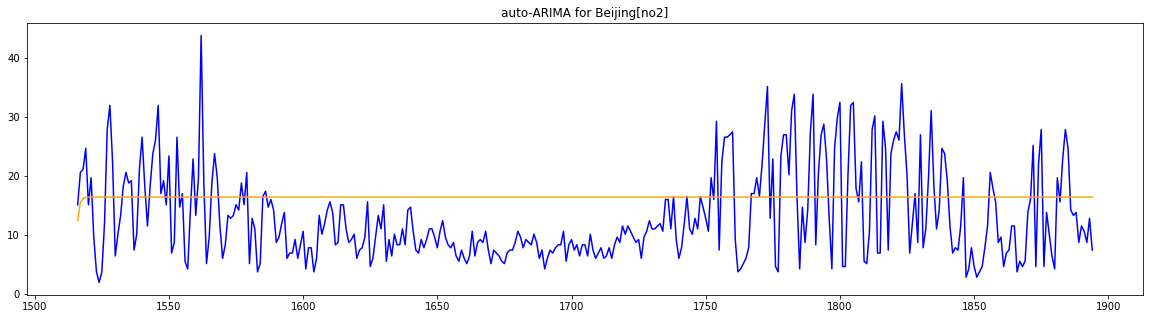

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=11018.767, Time=0.67 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=14434.918, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=11321.737, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=13131.612, Time=0.19 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=11029.033, Time=0.31 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=11018.384, Time=0.48 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=11134.338, Time=0.17 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=11230.801, Time=0.13 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=11018.496, Time=0.54 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=11169.843, Time=0.24 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=1.19 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=11009.165, Time=0.98 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=11096.957, Time=0.48 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=11133.924, Time=0.23 sec
 ARIMA(3,0,1)(0,0,0)[0] i

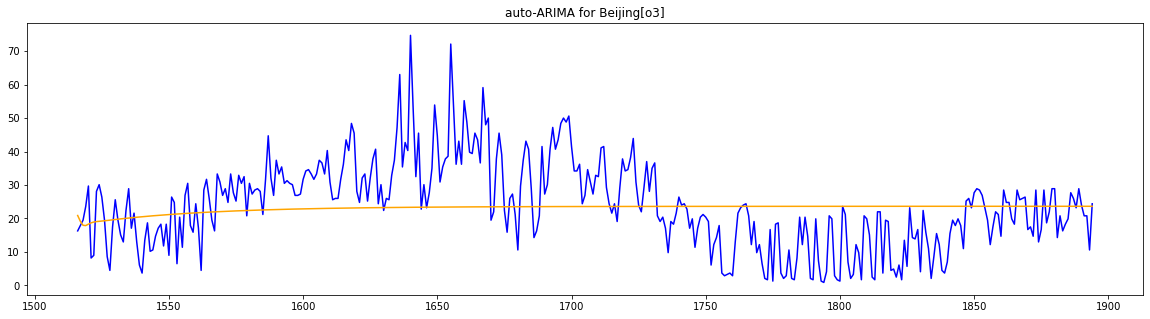

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.50 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=15918.373, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=15836.596, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=15707.608, Time=0.34 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=15916.373, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.56 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.48 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.29 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=15705.609, Time=0.17 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=inf, Time=0.31 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=15470.616, Time=0.25 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=inf, Time=0.51 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=15455.126, Time=0.36 sec
 ARIMA(1,1,3)(0,0,0)[0]             : AIC=inf, Time=0.88 sec
 ARIMA(0,1,4)(0,0,0)[0]             : AIC=inf, Time=0.64 sec


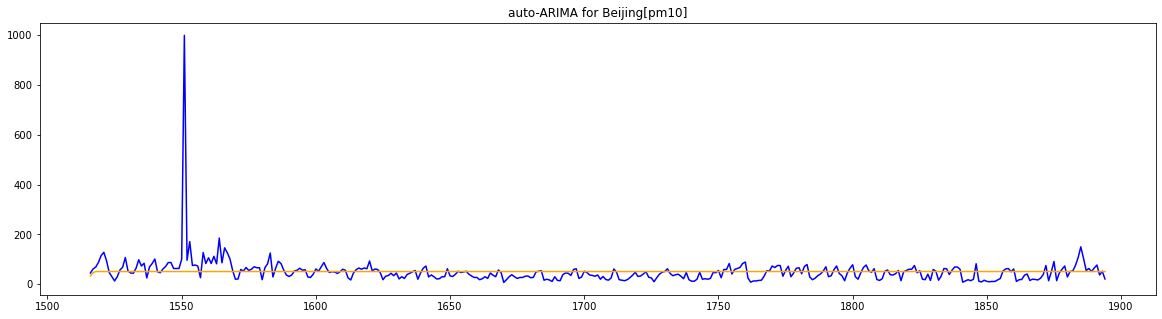

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.64 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=16760.312, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=16699.691, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=16618.406, Time=0.35 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=16758.312, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.86 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.53 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.85 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=16616.406, Time=0.21 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=inf, Time=0.47 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=16332.944, Time=0.30 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=inf, Time=0.51 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=16307.679, Time=0.42 sec
 ARIMA(1,1,3)(0,0,0)[0]             : AIC=inf, Time=0.96 sec
 ARIMA(0,1,4)(0,0,0)[0]             : AIC=inf, Time=0.53 sec


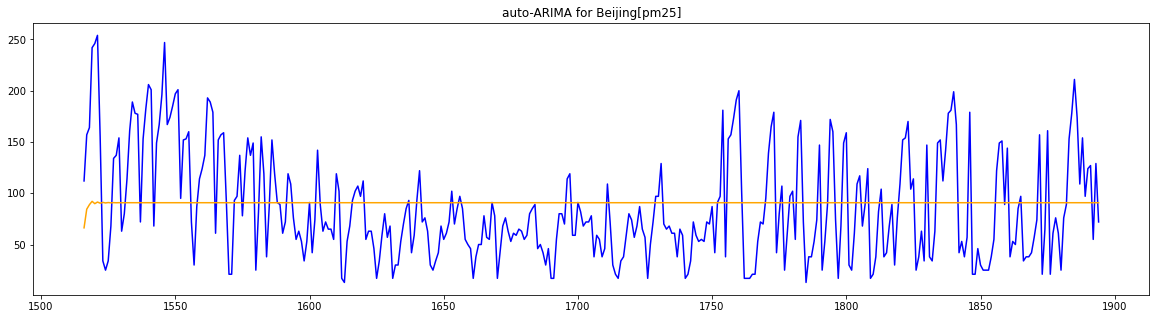

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=8352.327, Time=1.04 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=8883.814, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=8778.264, Time=0.28 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=8518.861, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=8881.819, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=8354.207, Time=0.61 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=8351.185, Time=0.45 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=8367.544, Time=0.52 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=8654.292, Time=0.27 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=8352.401, Time=0.75 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=8572.218, Time=0.30 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=8347.754, Time=1.08 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=8345.696, Time=1.16 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=8354.324, Time=0.92 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept

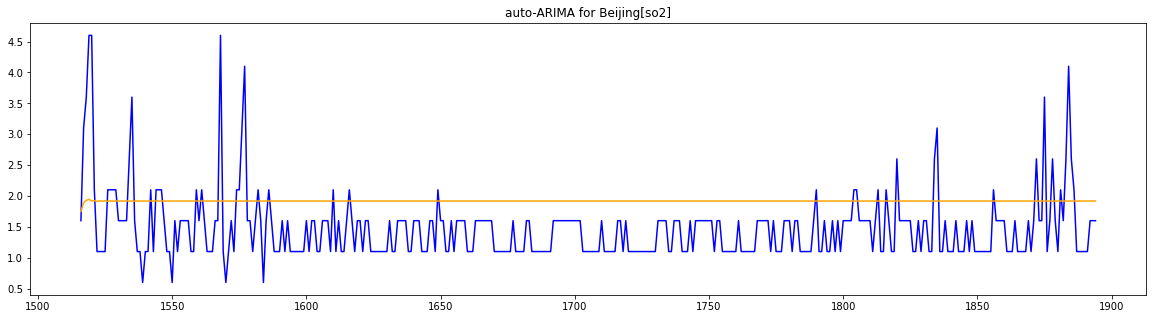

In [4]:
def auto_arima_forecast(city_data, city):
    training_percentage = 0.80
    #THERE ARE FIVE POLLUTANTS, THEREFORE FIVE TIME SERIES TO PREDICT WITH ARIMA
    for col in city_data:
        data = city_data[col]

        #SPLIT DATA INTO TRAIN AND TEST PORTIONS
        train = data[:int(training_percentage*(len(data)))]
        test = data[int(training_percentage*(len(data))):]

        #AUTO-ARIMA MODEL (data is not seasonal as seen from the graph above)
            
        model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True, seasonal=False)
        
        #PREDICT AS MANY PERIODS AS THE 'TEST' DATASET'S LENGTH
        forecast = model.predict(n_periods=len(test))
        forecast = pd.DataFrame(forecast,index = test.index,columns=['Forecast'])
        
        #CALCULATE ERROR METRICS FOR EACH TIME SERIES
        mse = mean_squared_error(test, forecast)
        rmse = math.sqrt(mean_squared_error(test, forecast))
        mae = mean_absolute_error(test, forecast)

        print("auto-ARIMA MSE for Beijing[" + str(col) + "]:" + str(mse))
        print("auto-ARIMA RMSE for Beijing[" + str(col) + "]:" + str(rmse))
        print("auto-ARIMA MAE for Beijing[" + str(col) + "]:" + str(mae))
        
        title = "auto-ARIMA for " + city + "[" + col +"]"
        # Plot the predictions for testation set
        plt.figure(figsize=(20, 5))
        plt.title(title)
        plt.plot(test, label='Actual Data', color='blue')
        plt.plot(forecast, label='Predicted Data', color='orange')
        plt.show()

auto_arima_forecast(Beijing_Data, "Beijing")

# Finding optimal ARIMA parameters manually

In [5]:
#Check data for stationarity to apply the ARIMA model.

#The null hypothesis is that the time series is non-stationary.
#Using the Augmented Dickey Fuller test (adfuller()) we can check for stationarity.
#If p-value < significance level(0.05), the we reject the null hypothesis.
#Otherwise, the time series is non-stationary and needs differencing.

print("Check if Beijing_Data is stationary :")
for col in Beijing_Data.columns:
    result = adfuller(Beijing_Data[col])
    print('p-value for ' + col + ' : %f' % result[1])

Check if Beijing_Data is stationary :
p-value for no2 : 0.000000
p-value for o3 : 0.000024
p-value for pm10 : 0.000000
p-value for pm25 : 0.000007
p-value for so2 : 0.000008


In [6]:
#Order of differencing (d) for 'no2'
print(ndiffs(Beijing_Data['no2'], test='adf'))

#Order of differencing (d) for 'o3'
print(ndiffs(Beijing_Data['o3'], test='adf'))

#Order of differencing (d) for 'pm10'
print(ndiffs(Beijing_Data['pm10'], test='adf'))

#Order of differencing (d) for 'pm25'
print(ndiffs(Beijing_Data['pm25'], test='adf'))

#Order of differencing (d) for 'so2'
print(ndiffs(Beijing_Data['so2'], test='adf'))

0
0
0
0
0


In [ ]:
#Ο3
#After checking the results above, the time series that need differencing is Beijing_Data['o3'],
#as p-value for o3 : 0.229985 > 0.05
plt.rcParams.update({'figure.figsize':(20,5)})

# Original Series
fig, axes = plt.subplots(1, 3)
axes[0].plot(Beijing_Data['o3']); axes[0].set_title('Original Series')
pl = autocorrelation_plot(Beijing_Data['o3'], ax=axes[1])
pl.set_xlim([0,100])
plot_pacf(Beijing_Data['o3'], ax=axes[2])

plt.show()

In [ ]:
#NO2
plt.rcParams.update({'figure.figsize':(20,5)})

# Original Series
fig, axes = plt.subplots(1, 3)
axes[0].plot(Beijing_Data['no2']); axes[0].set_title('Original Series')
pl = autocorrelation_plot(Beijing_Data['no2'], ax=axes[1])
pl.set_xlim([0,100])
plot_pacf(Beijing_Data['no2'], ax=axes[2])

plt.show()

In [ ]:
#SO2
plt.rcParams.update({'figure.figsize':(20,5)})

# Original Series
fig, axes = plt.subplots(1, 3)
axes[0].plot(Beijing_Data['so2']); axes[0].set_title('Original Series')
pl = autocorrelation_plot(Beijing_Data['so2'], ax=axes[1])
pl.set_xlim([0,200])
plot_pacf(Beijing_Data['so2'], ax=axes[2])

plt.show()

In [ ]:
#PM10
plt.rcParams.update({'figure.figsize':(20,5)})

# Original Series
fig, axes = plt.subplots(1, 3)
axes[0].plot(Beijing_Data['pm10']); axes[0].set_title('Original Series')
pl = autocorrelation_plot(Beijing_Data['pm10'], ax=axes[1])
pl.set_xlim([0,100])
plot_pacf(Beijing_Data['pm10'], ax=axes[2])

plt.show()

In [ ]:
#PM2.5
plt.rcParams.update({'figure.figsize':(20,5)})

# Original Series
fig, axes = plt.subplots(1, 3)
axes[0].plot(Beijing_Data['pm25']); axes[0].set_title('Original Series')
pl = autocorrelation_plot(Beijing_Data['pm25'], ax=axes[1])
pl.set_xlim([0,100])
plot_pacf(Beijing_Data['pm25'], ax=axes[2])

plt.show()

In [ ]:
#params = (p,d,q)

def manual_ARIMA(data, params):
    
    #SPLIT DATA TO TRAIN AND TEST PORTIONS
    train_size = int(len(data) * 0.8)
    train, test = data[0:train_size], data[train_size:]
    
    #PREDICTIONS WILL BE STORED IN A LIST
    predictions = list()
    
    #'fitted_values' IS GOING TO BE USED AS NEW TRAINING DATA EACH TIME. EVERY PREDICTION IS GOING TO BE
    #ADDED IN THE TRAIN PORTION FOR THE NEXT ITERATION FOR BETTER ACCURACY
    fitted_values = [x for x in train]

    for t in range(len(test)):
        #MODEL
        model = ARIMA(fitted_values, order=params)
        model_fit = model.fit()
        #print(model_fit.summary())
        
        #PREDICT TEST VALUES
        pred = model_fit.forecast()[0]
        predictions.append(pred)
        fitted_values.append(test.iloc[t])

    #error = math.sqrt(mean_squared_error(test, predictions))
    return predictions, test

In [ ]:
import itertools
import warnings
warnings.filterwarnings('ignore')
# Grid Search

def arima_grid_search(df, pollutant):

    p = q = range(5,11)
    d = [0]
    pdq = list(itertools.product(p,d,q)) # gets all possible combinations of p, d, and q 
    combs = {}
    aics = []
    # Grid Search Continued
    for combination in pdq:
        model = ARIMA(df, order=combination)
        model = model.fit()
        #print(model.summary())
        combs.update({model.aic : [combination]})
        aics.append(model.aic)
            
    best_aic = min(aics)
    
    print('best AIC is: ', best_aic)
    print ('ARIMA parameters: ', '\n', 'p: ', combs[best_aic][0][0], '\n', 'd: 0', '\n', 'q: ',combs[best_aic][0][2])
    
    forecast, test = manual_ARIMA(df, (combs[best_aic][0][0], 0, combs[best_aic][0][2]))
    forecast = pd.Series(forecast)
    forecast.index = test.index
    
    print("ARIMA MSE for Beijing " + str(pollutant)+" " + str(mean_squared_error(test, forecast)))
    print("ARIMA RMSE for Beijing " + str(pollutant)+" "  + str(math.sqrt(mean_squared_error(test, forecast))))
    print("ARIMA MAE for Beijing "+ str(pollutant)+" "  + str(mean_absolute_error(test, forecast)))
    
    title = "ARIMA for Beijing" + "[" + str(pollutant) +"]"
    plt.figure(figsize=(20, 5))
    plt.title(title)
    plt.plot(test, label='Actual Data', color='blue')
    plt.plot(forecast, label='Predicted Data', color='orange')
    plt.show()

    return forecast, test

In [ ]:
#O3
predictions_o3, test_o3 = arima_grid_search(Beijing_Data['o3'], 'o3')
#NO2
predictions_no2, test_no2 = arima_grid_search(Beijing_Data['no2'], 'no2')
#SO2
predictions_so2, test_so2 = arima_grid_search(Beijing_Data['so2'], 'so2')
#PM10
predictions_pm10, test_pm10 = arima_grid_search(Beijing_Data['pm10'], 'pm10')
#PM25
predictions_pm25, test_pm25 = arima_grid_search(Beijing_Data['pm25'], 'pm25')

## Repeat process for less data

In [ ]:
import pandas as pd
Athens_Data = pd.read_csv('Athens_Data.csv', index_col=0)

data_to_drop = len(Beijing_Data) - len(Athens_Data)
Beijing_less_data = Beijing_Data.iloc[data_to_drop: , :]
len(Beijing_less_data)

In [ ]:
#O3
arima_grid_search(Beijing_less_data['o3'], 'o3')
#NO2
arima_grid_search(Beijing_less_data['no2'], 'no2')
#SO2
arima_grid_search(Beijing_less_data['so2'], 'so2')
#PM10
arima_grid_search(Beijing_less_data['pm10'], 'pm10')
#PM25
arima_grid_search(Beijing_less_data['pm25'], 'pm25')

## ARIMA with seasonal split

The seasonal decomposition of the Beijing data we can see that there is a seasonality in the monthly resampled data. Specifically, for each pollutant the seasonal length of the data is:
- NO2: 12 months or 365 days
- SO2: 12 months
- O3: 12 months
- PM25: 12 months
- PM10: 12 months

I am going to keep parameters p,d,q same as above

In [ ]:
def seasonal_split_ARIMA(data, params):
    #SPLIT DATA TO TRAIN AND TEST PORTIONS
    train, test = data['2015-01-01' : '2021-12-31'], data['2022-01-01' : '2022-03-18']

    #PREDICTIONS WILL BE STORED IN A LIST
    predictions = list()
    
    #'fitted_values' IS GOING TO BE USED AS NEW TRAINING DATA EACH TIME. EVERY PREDICTION IS GOING TO BE
    #ADDED IN THE TRAIN PORTION FOR THE NEXT ITERATION FOR BETTER ACCURACY
    fitted_values = [x for x in train]

    for t in range(len(test)):
        
        #MODEL
        model = ARIMA(fitted_values, order=params)
        model_fit = model.fit()
        
        #PREDICT TEST VALUES
        pred = model_fit.forecast()[0]
        predictions.append(pred)
        fitted_values.append(test.iloc[t])      

    return predictions, test

In [ ]:
#O3
pred_o3_seasonal, test_o3_seasonal = seasonal_split_ARIMA(Beijing_Data['o3'], (5,0,5))
pred_o3_seasonal = pd.Series(pred_o3_seasonal)
pred_o3_seasonal.index = test_o3_seasonal.index

print("ARIMA MSE for Beijing[O3]:" + str(mean_squared_error(test_o3_seasonal, pred_o3_seasonal)))
print("ARIMA RMSE for Beijing[O3]:" + str(math.sqrt(mean_squared_error(test_o3_seasonal, pred_o3_seasonal))))
print("ARIMA MAE for Beijing[O3]:" + str(mean_absolute_error(test_o3_seasonal, pred_o3_seasonal)))

title = "ARIMA for Beijing[O3]"
plt.figure(figsize=(20, 5))
plt.title(title)
plt.plot(test_o3_seasonal, label='Actual Data', color='blue')
plt.plot(pred_o3_seasonal, label='Predicted Data', color='orange')
plt.show()

#NO2
pred_no2_seasonal, test_no2_seasonal = seasonal_split_ARIMA(Beijing_Data['no2'], (9,0,10))
pred_no2_seasonal = pd.Series(pred_no2_seasonal)
pred_no2_seasonal.index = test_no2_seasonal.index

print("ARIMA MSE for Beijing[NO2]:" + str(mean_squared_error(test_no2_seasonal, pred_no2_seasonal)))
print("ARIMA RMSE for Beijing[NO2]:" + str(math.sqrt(mean_squared_error(test_no2_seasonal, pred_no2_seasonal))))
print("ARIMA MAE for Beijing[NO2]:" + str(mean_absolute_error(test_no2_seasonal, pred_no2_seasonal)))

title = "ARIMA for Beijing[NO2]"
plt.figure(figsize=(20, 5))
plt.title(title)
plt.plot(test_no2_seasonal, label='Actual Data', color='blue')
plt.plot(pred_no2_seasonal, label='Predicted Data', color='orange')
plt.show()

#SO2
pred_so2_seasonal, test_so2_seasonal = seasonal_split_ARIMA(Beijing_Data['so2'], (5,0,7))
pred_so2_seasonal = pd.Series(pred_so2_seasonal)
pred_so2_seasonal.index = test_so2_seasonal.index

print("ARIMA MSE for Beijing[SO2]:" + str(mean_squared_error(test_so2_seasonal, pred_so2_seasonal)))
print("ARIMA RMSE for Beijing[SO2]:" + str(math.sqrt(mean_squared_error(test_so2_seasonal, pred_so2_seasonal))))
print("ARIMA MAE for Beijing[SO2]:" + str(mean_absolute_error(test_so2_seasonal, pred_so2_seasonal)))

title = "ARIMA for Beijing[SO2]"
plt.figure(figsize=(20, 5))
plt.title(title)
plt.plot(test_so2_seasonal, label='Actual Data', color='blue')
plt.plot(pred_so2_seasonal, label='Predicted Data', color='orange')
plt.show()

#PM10
pred_pm10_seasonal, test_pm10_seasonal = seasonal_split_ARIMA(Beijing_Data['pm10'], (6,0,6))
pred_pm10_seasonal = pd.Series(pred_pm10_seasonal)
pred_pm10_seasonal.index = test_pm10_seasonal.index

print("ARIMA MSE for Beijing[PM10]:" + str(mean_squared_error(test_pm10_seasonal, pred_pm10_seasonal)))
print("ARIMA RMSE for Beijing[PM10]:" + str(math.sqrt(mean_squared_error(test_pm10_seasonal, pred_pm10_seasonal))))
print("ARIMA MAE for Beijing[PM10]:" + str(mean_absolute_error(test_pm10_seasonal, pred_pm10_seasonal)))

title = "ARIMA for Beijing[PM10]"
plt.figure(figsize=(20, 5))
plt.title(title)
plt.plot(test_pm10_seasonal, label='Actual Data', color='blue')
plt.plot(pred_pm10_seasonal, label='Predicted Data', color='orange')
plt.show()

#PM25
pred_pm25_seasonal, test_pm25_seasonal = seasonal_split_ARIMA(Beijing_Data['pm25'], (9,0,5))
pred_pm25_seasonal = pd.Series(pred_pm25_seasonal)
pred_pm25_seasonal.index = test_pm25_seasonal.index

print("ARIMA MSE for Beijing[PM25]:" + str(mean_squared_error(test_pm25_seasonal, pred_pm25_seasonal)))
print("ARIMA RMSE for Beijing[PM25]:" + str(math.sqrt(mean_squared_error(test_pm25_seasonal, pred_pm25_seasonal))))
print("ARIMA MAE for Beijing[PM25]:" + str(mean_absolute_error(test_pm25_seasonal, pred_pm25_seasonal)))

title = "ARIMA for Beijing[PM25]"
plt.figure(figsize=(20, 5))
plt.title(title)
plt.plot(test_pm25_seasonal, label='Actual Data', color='blue')
plt.plot(pred_pm25_seasonal, label='Predicted Data', color='orange')
plt.show()

### ComBeijingon of monthly predicted and actual data

In [ ]:
Beijing_Data.index = pd.to_datetime(Beijing_Data.index)

In [ ]:
Beijing_monthly = Beijing_Data.resample("1m").mean().bfill()

In [ ]:
predictions_o3.index = pd.to_datetime(predictions_o3.index)
predictions_no2.index = pd.to_datetime(predictions_no2.index)
predictions_so2.index = pd.to_datetime(predictions_so2.index)
predictions_pm10.index = pd.to_datetime(predictions_pm10.index)
predictions_pm25.index = pd.to_datetime(predictions_pm25.index)

test_o3.index = pd.to_datetime(test_o3.index)
test_no2.index = pd.to_datetime(test_no2.index)
test_so2.index = pd.to_datetime(test_so2.index)
test_pm10.index = pd.to_datetime(test_pm10.index)
test_pm25.index = pd.to_datetime(test_pm25.index)

In [ ]:
preds_monthly = [predictions_o3.resample("1m").mean().bfill(), predictions_no2.resample("1m").mean().bfill(), 
                 predictions_so2.resample("1m").mean().bfill(), predictions_pm10.resample("1m").mean().bfill(),
                 predictions_pm25.resample("1m").mean().bfill()]
test_monthly = [test_o3.resample("1m").mean().bfill(), test_no2.resample("1m").mean().bfill(), test_so2.resample("1m").mean().bfill(),
                test_pm10.resample("1m").mean().bfill(), test_pm25.resample("1m").mean().bfill()]

In [ ]:
print("O3\n")
print("ARIMA MSE for Beijing[O3]:" + str(mean_squared_error(test_monthly[0], preds_monthly[0])))
print("ARIMA RMSE for Beijing[O3]:" + str(math.sqrt(mean_squared_error(test_monthly[0], preds_monthly[0]))))
print("ARIMA MAE for Beijing[O3]:" + str(mean_absolute_error(test_monthly[0], preds_monthly[0])))
print("\n")

print("NO2\n")
print("ARIMA MSE for Beijing[NO2]:" + str(mean_squared_error(test_monthly[1], preds_monthly[1])))
print("ARIMA RMSE for Beijing[NO2]:" + str(math.sqrt(mean_squared_error(test_monthly[1], preds_monthly[1]))))
print("ARIMA MAE for Beijing[NO2]:" + str(mean_absolute_error(test_monthly[1], preds_monthly[1])))
print("\n")

print("SO2\n")
print("ARIMA MSE for Beijing[SO2]:" + str(mean_squared_error(test_monthly[2], preds_monthly[2])))
print("ARIMA RMSE for Beijing[SO2]:" + str(math.sqrt(mean_squared_error(test_monthly[2], preds_monthly[2]))))
print("ARIMA MAE for Beijing[SO2]:" + str(mean_absolute_error(test_monthly[2], preds_monthly[2])))
print("\n")

print("PM10\n")
print("ARIMA MSE for Beijing[PM10]:" + str(mean_squared_error(test_monthly[3], preds_monthly[3])))
print("ARIMA RMSE for Beijing[PM10]:" + str(math.sqrt(mean_squared_error(test_monthly[3], preds_monthly[3]))))
print("ARIMA MAE for Beijing[PM10]:" + str(mean_absolute_error(test_monthly[3], preds_monthly[3])))
print("\n")

print("PM25\n")
print("ARIMA MSE for Beijing[PM25]:" + str(mean_squared_error(test_monthly[4], preds_monthly[4])))
print("ARIMA RMSE for Beijing[PM25]:" + str(math.sqrt(mean_squared_error(test_monthly[4], preds_monthly[4]))))
print("ARIMA MAE for Beijing[PM25]:" + str(mean_absolute_error(test_monthly[4], preds_monthly[4])))